In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
})


# Fonctions

In [4]:
def initialisation(dimensions):
    
    parametres = {}
    C = len(dimensions)

    np.random.seed(1)

    for c in range(1, C):
        parametres['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c - 1])
        parametres['b' + str(c)] = np.random.randn(dimensions[c], 1)

    return parametres

In [5]:
def forward_propagation(X, parametres):
  
  activations = {'A0': X}

  C = len(parametres) // 2

  for c in range(1, C + 1):

    Z = parametres['W' + str(c)].dot(activations['A' + str(c - 1)]) + parametres['b' + str(c)]
    # Sigmoid
    activations['A' + str(c)] = 1 / (1 + np.exp(-Z))
    # ReLU
    #activations['A' + str(c)] = np.maximum(0, Z)

  return activations

In [6]:
def back_propagation(y, parametres, activations):

  m = y.shape[1]
  C = len(parametres) // 2

  dZ = activations['A' + str(C)] - y
  gradients = {}

  for c in reversed(range(1, C + 1)):
    gradients['dW' + str(c)] = 1/m * np.dot(dZ, activations['A' + str(c - 1)].T)
    gradients['db' + str(c)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    if c > 1:
      dZ = np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])

  return gradients

In [7]:
def update(gradients, parametres, learning_rate):

    C = len(parametres) // 2

    for c in range(1, C + 1):
        parametres['W' + str(c)] = parametres['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
        parametres['b' + str(c)] = parametres['b' + str(c)] - learning_rate * gradients['db' + str(c)]

    return parametres

In [20]:
def predict(X, parametres):
  activations = forward_propagation(X, parametres)
  C = len(parametres) // 2
  Af = activations['A' + str(C)]
  return Af >= 0.5

In [23]:
def deep_neural_network(X, y, hidden_layers = (16, 16, 16), learning_rate = 0.001, n_iter = 3000):
    
    # initialisation parametres
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])

    parametres = initialisation(dimensions)

    # tableau numpy contenant les futures accuracy et log_loss
    training_history = np.zeros((int(n_iter), 2))

    C = len(parametres) // 2

    # gradient descent
    for i in tqdm(range(n_iter)):

        activations = forward_propagation(X, parametres)
        gradients = back_propagation(y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)
        Af = activations['A' + str(C)]
        y_pred = Af

        # calcul du log_loss et de l'accuracy
        training_history[i, 0] = (log_loss(y.flatten(), y_pred.flatten()))
        y_pred = predict(X, parametres)
        training_history[i, 1] = (accuracy_score(y.flatten(), y_pred.flatten()))


    # Frontiere de décision
    x1 = np.linspace(-1.5, 1.5, 100)
    x2 = np.linspace(-1.5, 1.5, 100)
    xx1, xx2 = np.meshgrid(x1, x2)
    grid = np.vstack((xx1.ravel(), xx2.ravel())) # Concatenation des deux matrices ligne par ligne
    print(grid.shape)
    Z = predict(grid, parametres)
    Z = Z.reshape(xx1.shape)

    # Plot frontiere de décision
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.contourf(xx1, xx2, Z, cmap='coolwarm', alpha=0.5)
    plt.scatter(X[0, :], X[1, :], c=y.flatten(), cmap='coolwarm')
    plt.title('Decision boundary of y_true')
    plt.subplot(1, 2, 2)
    plt.contourf(xx1, xx2, Z, cmap='coolwarm', alpha=0.5)
    plt.scatter(X[0, :], X[1, :], c=y_pred.flatten(), cmap='coolwarm')
    plt.title('Decision boundary of y_pred')
    
    # Plot courbe d'apprentissage
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(training_history[:, 0], label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(training_history[:, 1], label='train acc')
    plt.legend()
    plt.show()

    return parametres

# Dataset

[0.93214973 0.18081215]
[0]
dimensions de X: (2, 100)
dimensions de y: (1, 100)


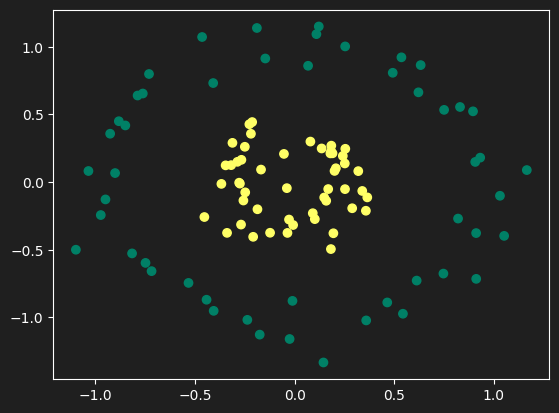

In [24]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print(X[:,2])
print(y[:,2])

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

100%|██████████| 3000/3000 [00:04<00:00, 634.26it/s]


(2, 10000)


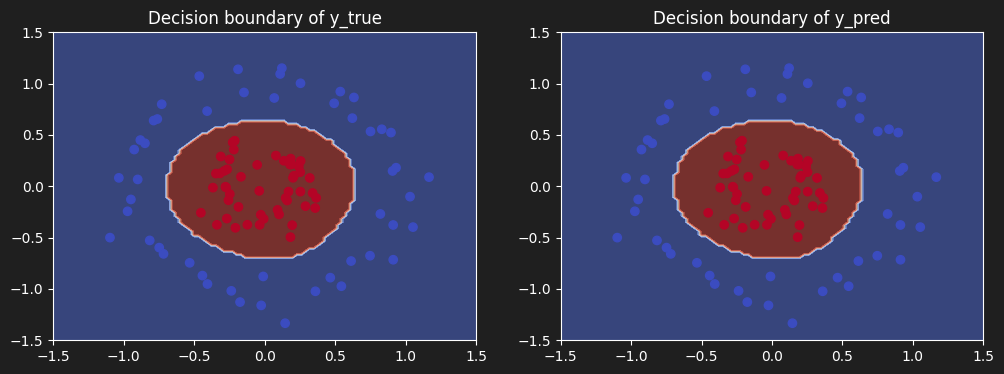

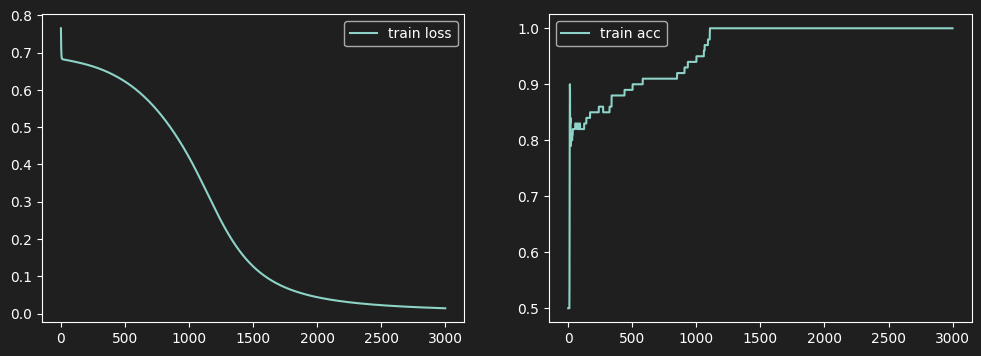

In [25]:
params = deep_neural_network(X, y, hidden_layers = (16, 16, 16), learning_rate = 0.1, n_iter = 3000)

In [12]:
X_train_set = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
y_train_set = np.array([[1], [0], [0], [0]]).T

print('dimensions de X_train_set:', X_train_set.shape)

new_predictions = predict(X_train_set, params)
print(new_predictions)

print(accuracy_score(y_train_set, new_predictions))

dimensions de X_train_set: (2, 4)
[[9.97394530e-01 1.16750538e-02 1.72598465e-02 6.88947738e-04]]
[[ True False False False]]
1.0


In [ ]:
params = deep_neural_network(X, y, hidden_layers = (32, 32, 32), learning_rate = 0.1, n_iter = 200)

# DATA SET 2 avec 3 class

[0.01288097 0.01556285]
[0]
dimensions de X: (2, 300)
dimensions de y: (1, 300)


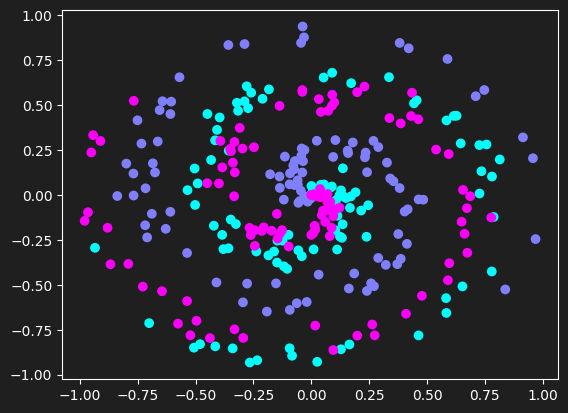

In [14]:
#import nnfs
#from nnfs.datasets import spiral_data
#
#nnfs.init()
#
#X, y = spiral_data(samples=100, classes=3)
#
#X = X.T
#y = y.reshape((1, y.shape[0]))
#
#print(X[:,2])
#print(y[:,2])
#
#print('dimensions de X:', X.shape)
#print('dimensions de y:', y.shape)
#
#plt.scatter(X[0, :], X[1, :], c=y, cmap="cool")
#plt.show()

In [ ]:
#params = deep_neural_network(X, y, hidden_layers = (16, 16, 16), learning_rate = 0.1, n_iter = 3000)

Impossible avec un seul neuron a la sortie.
A voir, mais je crois quil est necessaire de changer lactivation pour softmax si on veut plus dun neuron